In [ ]:
# Para visualización en notebook
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set_context('poster')
mpl.rcParams['figure.figsize'] = (8,6)

# Números y Datos
import numpy as np
import pandas as pd

import networkx as nx

from glob import glob
from pathlib import Path

import copy as cp

In [ ]:
!wget -q https://www.dropbox.com/s/eei6gnw10o20mcn/DataSujetos.zip?dl=1 -O DataSujetos.zip
!unzip -q DataSujetos

In [ ]:
def subjectmatrix2graphslist(filename, densities):
    """
    Toma un archivo csv con la matriz de input y devuelve una lista de grafos con la densisdad de aristas correspondiente
    """
    
    correlation_matrix = pd.read_csv(filename, header=None)
    n = correlation_matrix.shape[0]
    correlation_matrix -= np.diag(np.ones(n))
    max_links = (n*n-n)//2
    tril_idx = np.tril_indices(n,-1)
    sorted_correlations = sorted(correlation_matrix.values[tril_idx].flatten(),reverse=True)
    
    Gs = []
    for d in densities:
        idx = int(d*max_links)
        threshold = sorted_correlations[idx]
        Gs.append(nx.from_pandas_adjacency(correlation_matrix>=threshold))
        
    return Gs

In [ ]:
def binarize(matrix, densities):
    
    n = matrix.shape[0]
    matrix -= np.diag(np.ones(n))
    max_links = (n*n-n)//2
    tril_idx = np.tril_indices(n,-1)
    sorted_correlations = sorted(matrix.values[tril_idx].flatten(),reverse=True)
    
    Gs = []
    for d in densities:
        idx = int(d*max_links)
        threshold = sorted_correlations[idx]
        Gs.append(nx.from_pandas_adjacency(matrix>=threshold))
        
    return Gs

In [ ]:
filenames_N1 = list(Path('DataSujetos').glob('N1_*.csv'))
filenames_N2 = list(Path('DataSujetos').glob('N2_*.csv'))
filenames_N3 = list(Path('DataSujetos').glob('N3_*.csv'))
filenames_W  = list(Path('DataSujetos').glob('W_*.csv'))

In [ ]:
densities = np.linspace(0.025,0.15,10)
graphs_N1 = {}
for filename in filenames_N1:
    Gs = subjectmatrix2graphslist(filename, densities)
    name = Path(filename).stem
    graphs_N1[name] = Gs
graphs_N2 = {}
for filename in filenames_N2:
    Gs = subjectmatrix2graphslist(filename, densities)
    name = Path(filename).stem
    graphs_N2[name] = Gs
graphs_N3 = {}
for filename in filenames_N3:
    Gs = subjectmatrix2graphslist(filename, densities)
    name = Path(filename).stem
    graphs_N3[name] = Gs
graphs_W = {}
for filename in filenames_W:
    Gs = subjectmatrix2graphslist(filename, densities)
    name = Path(filename).stem
    graphs_W[name] = Gs

In [ ]:
print(len(list(filenames_N1)))

18


# Heatmaps


In [ ]:
def avg_corr_matrix(filenames):
    n = len(filenames)
    acum = np.zeros((116,116))
    for filename in filenames:
      acum += pd.read_csv(filename, header=None)
      
        
    return acum/n

In [ ]:
avg_corr_N1 = avg_corr_matrix(filenames_N1)
avg_corr_N2 = avg_corr_matrix(filenames_N2)
avg_corr_N3 = avg_corr_matrix(filenames_N3)
avg_corr_W  = avg_corr_matrix(filenames_W)

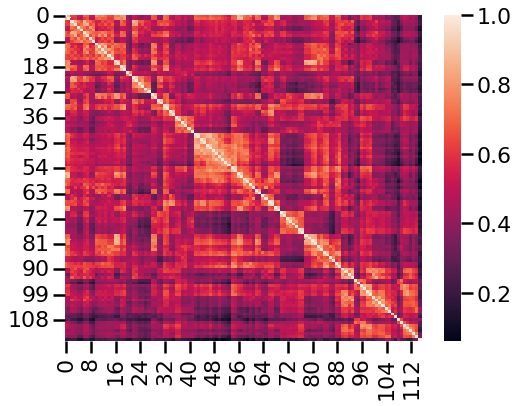

In [ ]:
sns.heatmap(avg_corr_W);

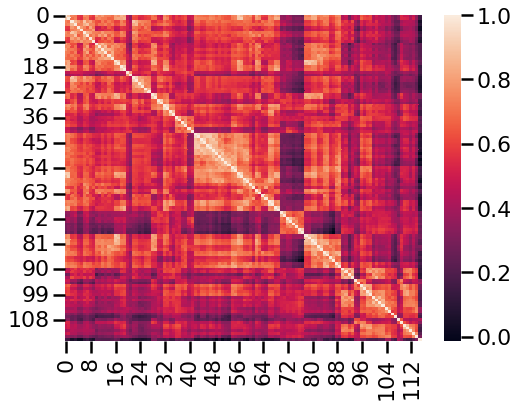

In [ ]:
sns.heatmap(avg_corr_N1);

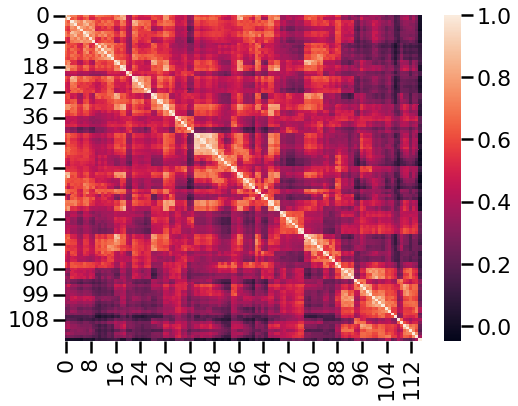

In [ ]:
sns.heatmap(avg_corr_N2);

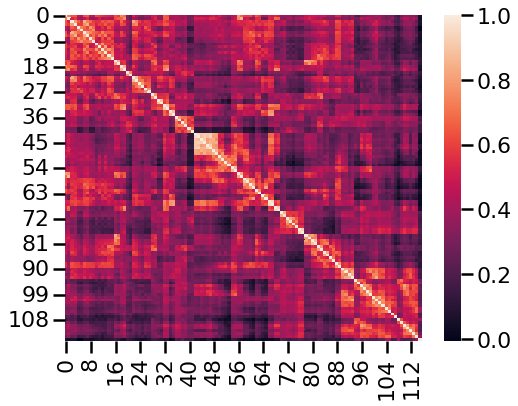

In [ ]:
sns.heatmap(avg_corr_N3);

In [ ]:
G_W = nx.from_numpy_matrix(avg_corr_W.to_numpy())
nx.draw(G_W)

#En base a una densidad

In [ ]:
densities = [0.1]
graphs_avg_N1 = binarize(avg_corr_N1, densities)[0]

In [ ]:
nx.average_clustering(graphs_avg_N1)

0.5640692379939227

In [ ]:
nx.all_pairs_shortest_path_length(graphs_avg_N1) #resolver

<generator object all_pairs_shortest_path_length at 0x7ff97a353a50>

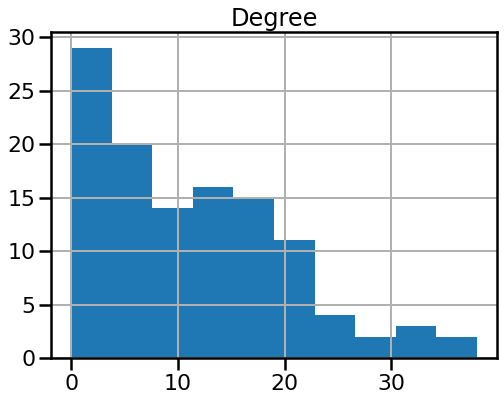

In [ ]:
pd.DataFrame(graphs_avg_N1.degree,columns=['Node','Degree']).set_index('Node').hist();

In [ ]:
pos = nx.spring_layout(graphs_avg_N1,k=0.2)

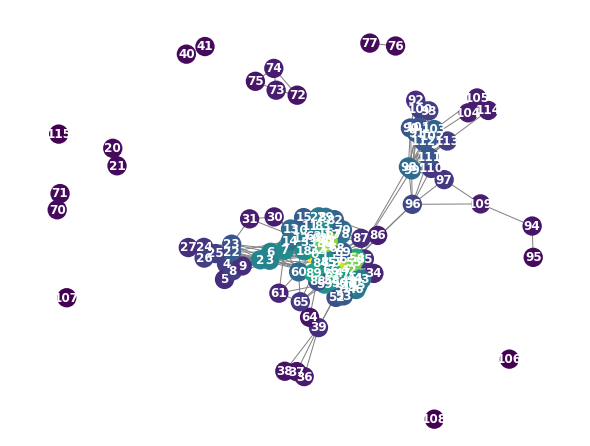

In [ ]:
centrality = nx.degree_centrality(graphs_avg_N1)
values = [v for n,v in centrality.items()]
nx.draw(graphs_avg_N1,pos=pos, with_labels=True, font_weight='bold',node_color = values, font_color='white', edge_color='gray')

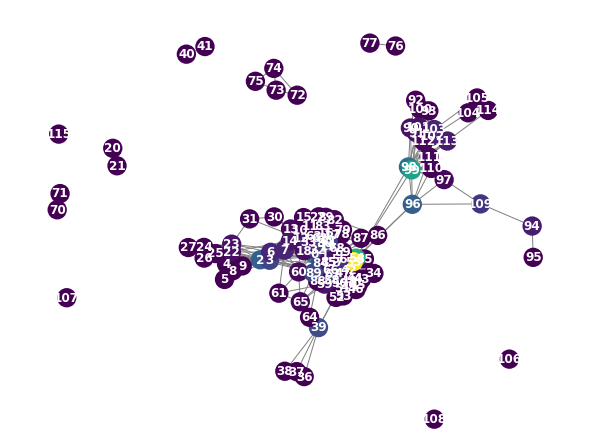

In [ ]:
centrality = nx.betweenness_centrality(graphs_avg_N1)
values = [v for n,v in centrality.items()]
nx.draw(graphs_avg_N1,pos=pos, with_labels=True, font_weight='bold',node_color = values, font_color='white', edge_color='gray')

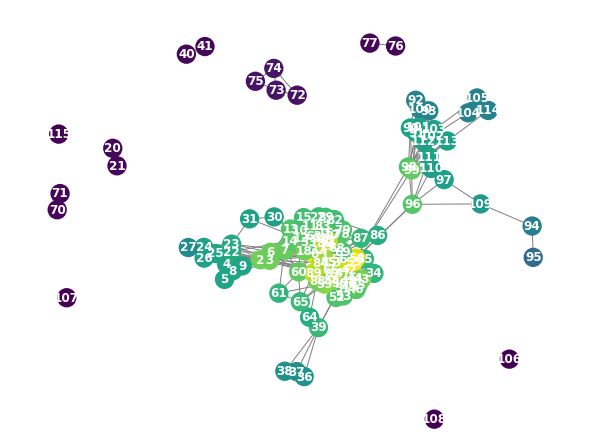

In [ ]:
centrality = nx.closeness_centrality(graphs_avg_N1)
values = [v for n,v in centrality.items()]
nx.draw(graphs_avg_N1,pos=pos, with_labels=True, font_weight='bold',node_color = values, font_color='white', edge_color='gray')

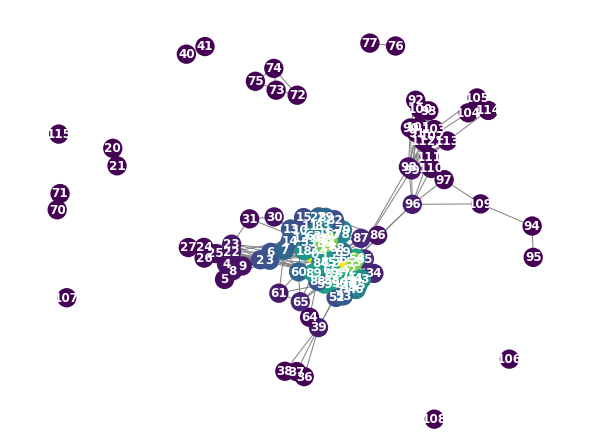

In [ ]:
centrality = nx.eigenvector_centrality(graphs_avg_N1)
values = [v for n,v in centrality.items()]
nx.draw(graphs_avg_N1,pos=pos, with_labels=True, font_weight='bold',node_color = values, font_color='white', edge_color='gray')

#En base a varias densidades

In [ ]:
densities = np.linspace(0.001,0.2,50)
graphs_avg_N1 = binarize(avg_corr_N1, densities)

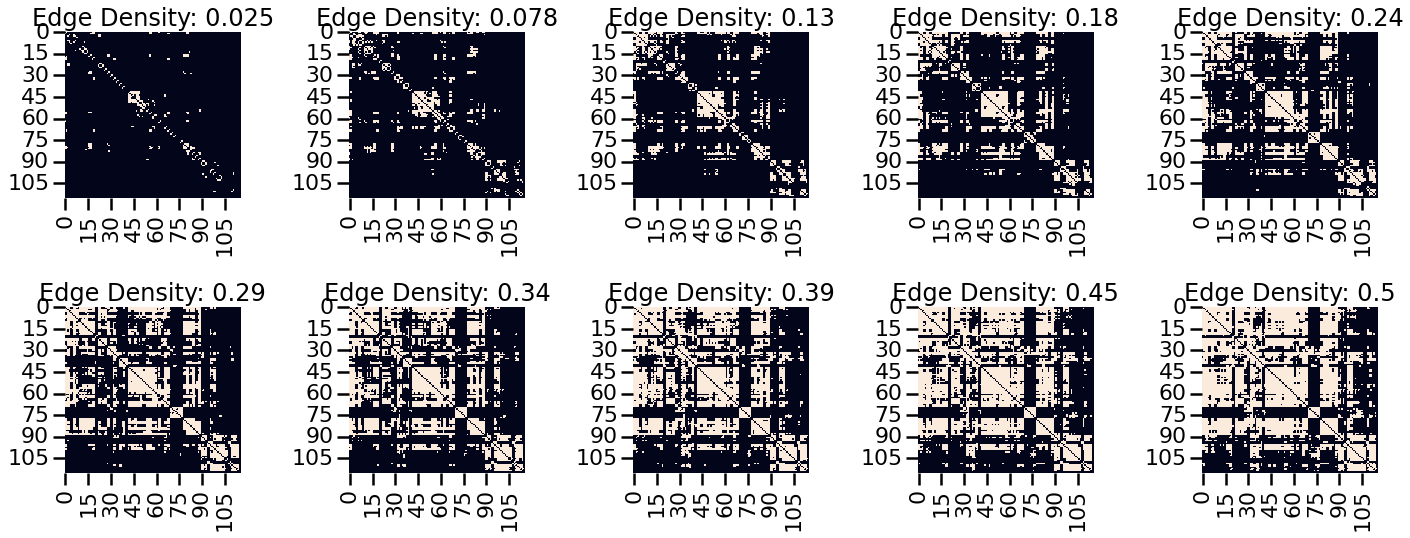

In [ ]:
plt.figure(figsize=(20,8))
for i, G in enumerate(graphs_avg_N1):
    plt.subplot(2,5,i+1)
    sns.heatmap(nx.to_numpy_array(G),cbar=False)
    plt.title('Edge Density: {:0.2}'.format(densities[i]))
plt.tight_layout()

In [ ]:
graphs_avg_N2 = binarize(avg_corr_N2, densities)

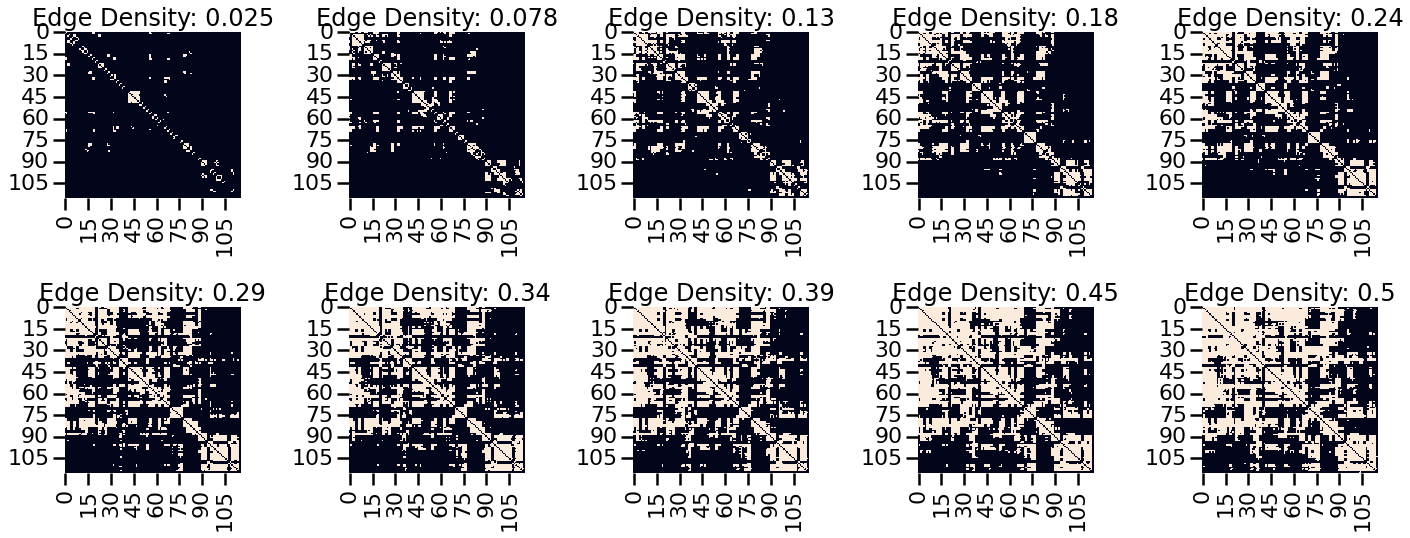

In [ ]:
plt.figure(figsize=(20,8))
for i, G in enumerate(graphs_avg_N2):
    plt.subplot(2,5,i+1)
    sns.heatmap(nx.to_numpy_array(G),cbar=False)
    plt.title('Edge Density: {:0.2}'.format(densities[i]))
plt.tight_layout()

In [ ]:
graphs_avg_N3 = binarize(avg_corr_N3, densities)

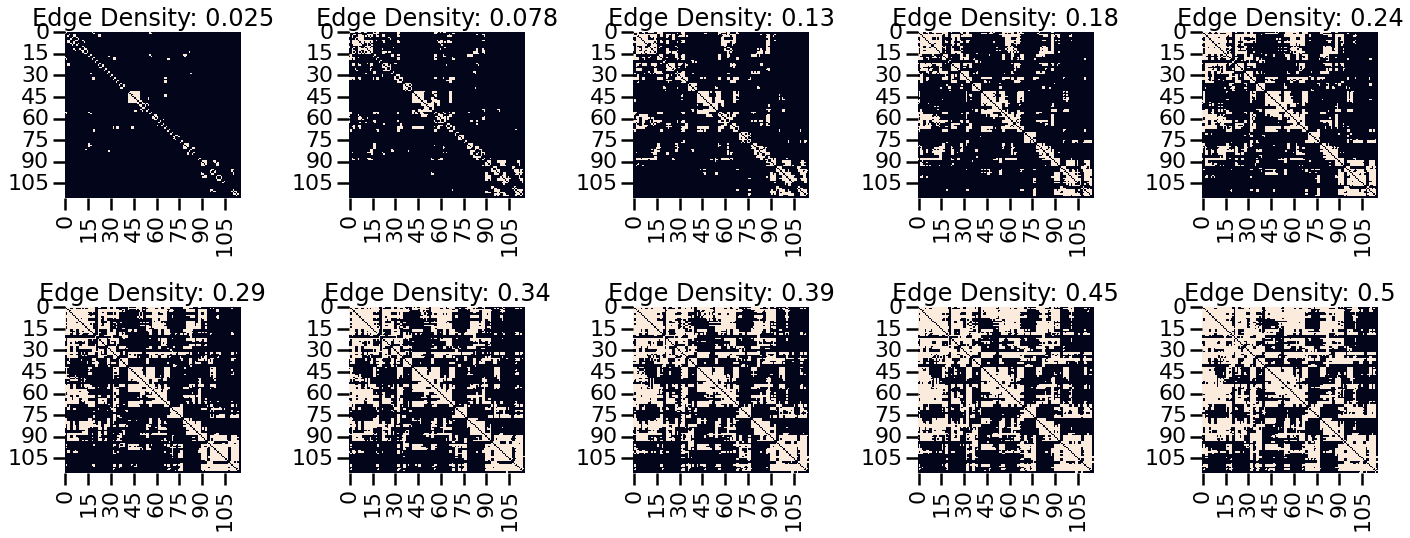

In [ ]:
plt.figure(figsize=(20,8))
for i, G in enumerate(graphs_avg_N3):
    plt.subplot(2,5,i+1)
    sns.heatmap(nx.to_numpy_array(G),cbar=False)
    plt.title('Edge Density: {:0.2}'.format(densities[i]))
plt.tight_layout()

In [ ]:
graphs_avg_W = binarize(avg_corr_W, densities)

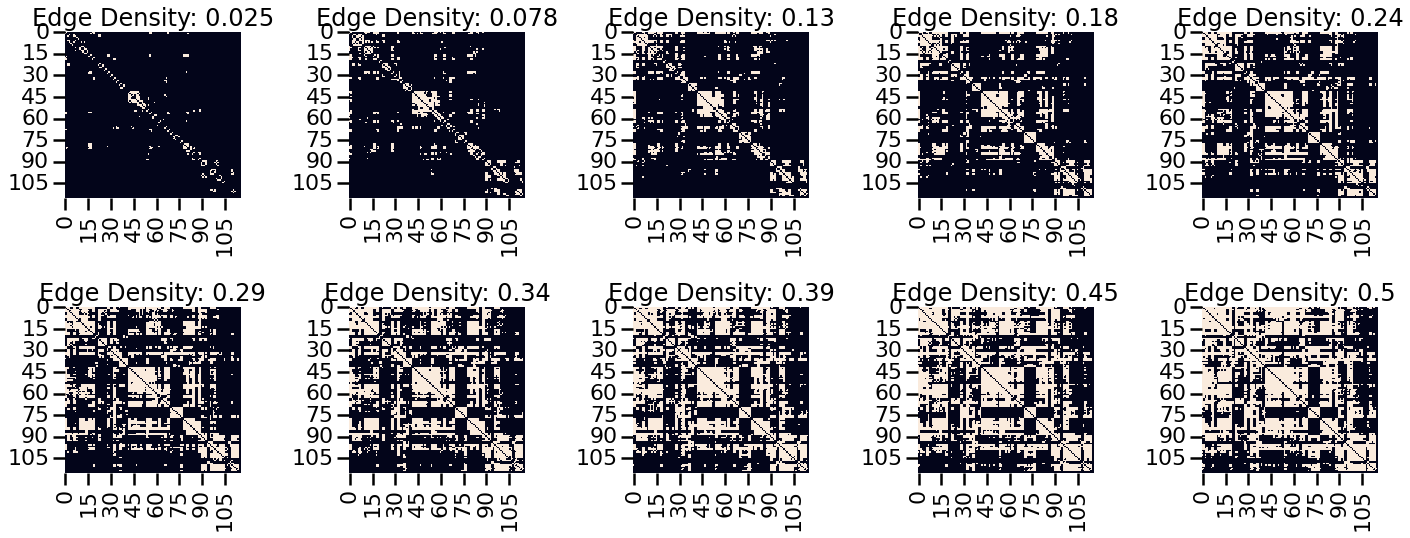

In [ ]:
plt.figure(figsize=(20,8))
for i, G in enumerate(graphs_avg_W):
    plt.subplot(2,5,i+1)
    sns.heatmap(nx.to_numpy_array(G),cbar=False)
    plt.title('Edge Density: {:0.2}'.format(densities[i]))
plt.tight_layout()

# Caracteristizacion en funcion de densidad

In [ ]:
all_graphs = {"W": graphs_avg_W, 
              "N1": graphs_avg_N1, 
              "N2": graphs_avg_N2, 
              "N3": graphs_avg_N3}

## Grado promedio

In [ ]:
df_grado = pd.DataFrame()
for graph_list in all_graphs:
  for index, g in enumerate(all_graphs[graph_list]):
    #degree_by_node = nx.degree_centrality(g)
    degree_by_node = dict(g.degree)
    mean_degree = np.array(list(degree_by_node.values())).mean()
    new_row = {"grado": mean_degree,
               "densidad": densities[index],
               "estadio": graph_list}
    df_grado = df_grado.append(new_row, ignore_index=True)
df_grado.set_index('densidad', inplace=True)

Text(0, 0.5, 'Centralidad de grado (promedio)')

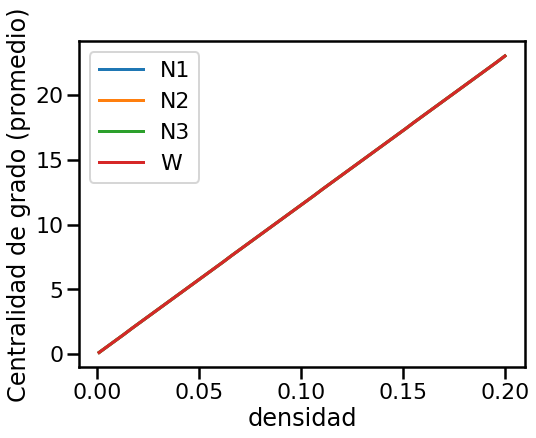

In [ ]:
df_grado.groupby('estadio')['grado'].plot(legend=True)
plt.ylabel('Centralidad de grado (promedio)')

## Grado max

In [ ]:
df_grado_max = pd.DataFrame()
for graph_list in all_graphs:
  for index, g in enumerate(all_graphs[graph_list]):
    # me quedo con la componente gigante
    G = cp.deepcopy(g)
    Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
    G = G.subgraph(Gcc[0])
    # calcula grado maximo
    degree_by_node = dict(G.degree)
    max_degree = np.array(list(degree_by_node.values())).max()
    new_row = {"grado": max_degree,
               "densidad": densities[index],
               "estadio": graph_list}
    df_grado_max = df_grado_max.append(new_row, ignore_index=True)
df_grado_max.set_index('densidad', inplace=True)

Text(0, 0.5, 'Centralidad de grado (max)')

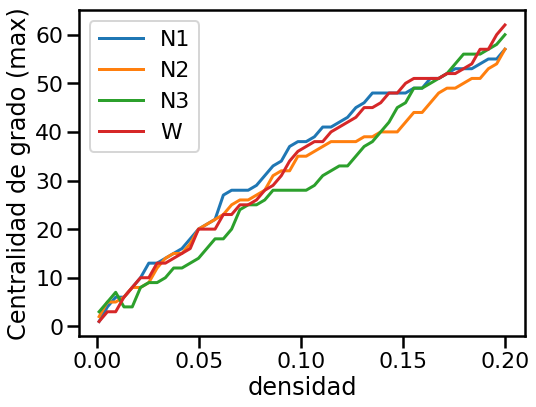

In [ ]:
df_grado_max.groupby('estadio')['grado'].plot(legend=True)
plt.ylabel('Centralidad de grado (max)')

## Grado min

In [ ]:
df_grado_min = pd.DataFrame()
for graph_list in all_graphs:
  for index, g in enumerate(all_graphs[graph_list]):
    # me quedo con la componente gigante
    G = cp.deepcopy(g)
    Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
    G = G.subgraph(Gcc[0])
    # calculo grado minimo
    degree_by_node = dict(G.degree)
    min_degree = np.array(list(degree_by_node.values())).min()
    new_row = {"grado": min_degree,
               "densidad": densities[index],
               "estadio": graph_list}
    df_grado_min = df_grado_min.append(new_row, ignore_index=True)
df_grado_min.set_index('densidad', inplace=True)

Text(0, 0.5, 'Centralidad de grado (min)')

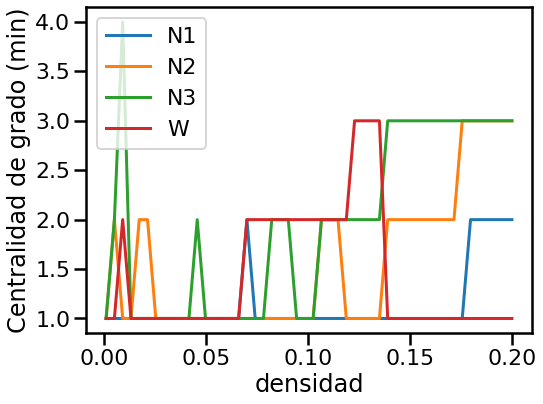

In [ ]:
df_grado_min.groupby('estadio')['grado'].plot(legend=True)
plt.ylabel('Centralidad de grado (min)')

## Camino mínimo promedio
lo calculo sobre la componente gigante. Si hay dos componentes o nodos sueltos la función nx.average_shortest_path explota.

In [ ]:
df_min_path = pd.DataFrame()
for graph_list in all_graphs:
  for index, g in enumerate(all_graphs[graph_list]):
    # me quedo con la componente gigante
    G = cp.deepcopy(g)
    Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
    G = G.subgraph(Gcc[0])
    # calculo camino minimo
    mean_min_path = nx.average_shortest_path_length(G)
    new_row = {"camino minimo": mean_min_path,
               "densidad": densities[index],
               "estadio": graph_list}
    df_min_path = df_min_path.append(new_row, ignore_index=True)
df_min_path.set_index('densidad', inplace=True)

Text(0, 0.5, 'Camino mínimo')

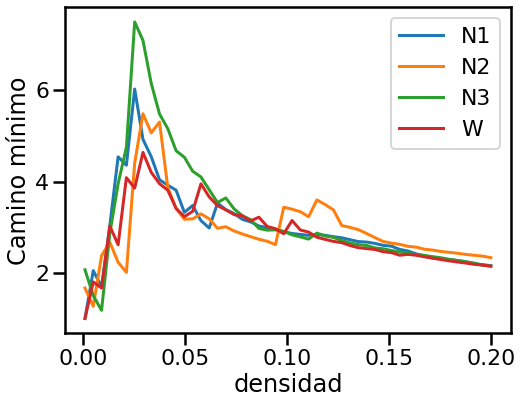

In [ ]:
df_min_path.groupby('estadio')['camino minimo'].plot(legend=True)
plt.ylabel('Camino mínimo')

## Betweenness

In [ ]:
df_betweenness = pd.DataFrame()
for graph_list in all_graphs:
  for index, g in enumerate(all_graphs[graph_list]):
    betweenness_by_node = nx.betweenness_centrality(g)
    mean_betweenness = np.array(list(betweenness_by_node.values())).mean()
    new_row = {"betweenness": mean_betweenness,
               "densidad": densities[index],
               "estadio": graph_list}
    df_betweenness = df_betweenness.append(new_row, ignore_index=True)

Text(0, 0.5, 'Betweenness')

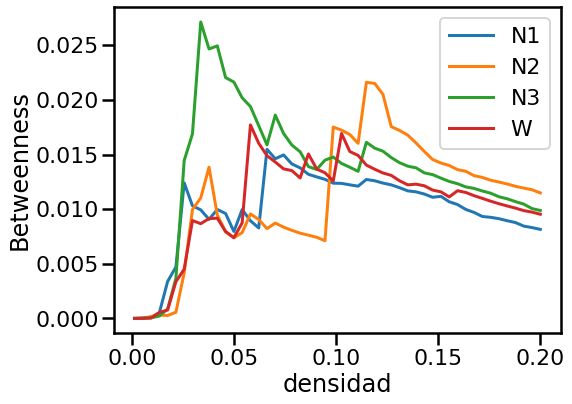

In [ ]:
df_betweenness.set_index('densidad', inplace=True)
df_betweenness.groupby('estadio')['betweenness'].plot(legend=True)
plt.ylabel('Betweenness')

## Coeficeinte de clustering

In [ ]:
df_clustering = pd.DataFrame()
for graph_list in all_graphs:
  for index, g in enumerate(all_graphs[graph_list]):
    clustering_by_node = nx.clustering(g)
    mean_clustering = np.array(list(clustering_by_node.values())).mean()
    new_row = {"clustering": mean_clustering,
               "densidad": densities[index],
               "estadio": graph_list}
    df_clustering = df_clustering.append(new_row, ignore_index=True)
df_clustering.set_index('densidad', inplace=True)

Text(0, 0.5, 'Coeficiente de clustering')

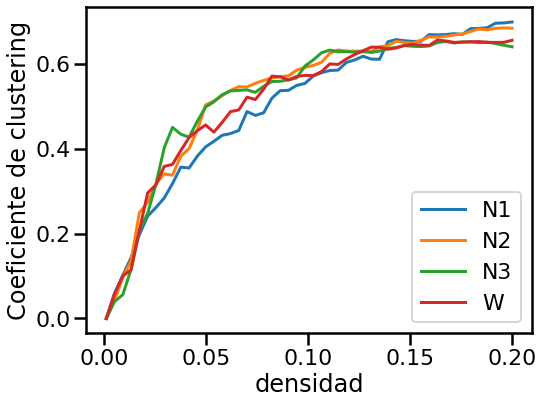

In [ ]:
df_clustering.groupby('estadio')['clustering'].plot(legend=True)
plt.ylabel('Coeficiente de clustering')

## Closeness



In [ ]:
df_closeness = pd.DataFrame()
for graph_list in all_graphs:
  for index, g in enumerate(all_graphs[graph_list]):
    closeness_by_node = nx.closeness_centrality(g)
    mean_clustering = np.array(list(closeness_by_node.values())).mean()
    new_row = {"closeness": mean_clustering,
               "densidad": densities[index],
               "estadio": graph_list}
    df_closeness = df_closeness.append(new_row, ignore_index=True)
df_closeness.set_index('densidad', inplace=True)

Text(0, 0.5, 'Closeness')

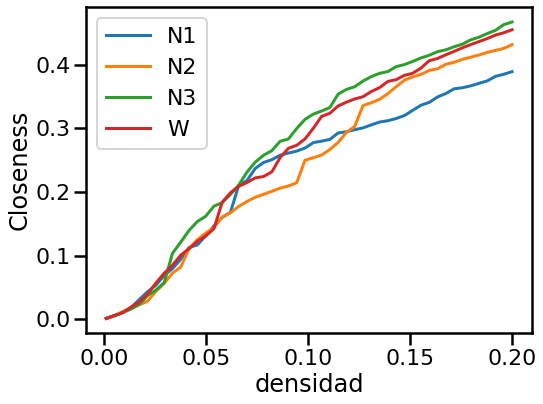

In [ ]:
df_closeness.groupby('estadio')['closeness'].plot(legend=True)
plt.ylabel('Closeness')

## Eigenvector

In [ ]:
df_eigenvector = pd.DataFrame()
for graph_list in all_graphs:
  for index, g in enumerate(all_graphs[graph_list]):
    eigenvector_by_node = nx.eigenvector_centrality(g, max_iter =1000)
    mean_eigenvector = np.array(list(eigenvector_by_node.values())).mean()
    sd_eigenvector = np.array(list(eigenvector_by_node.values())).std()
    new_row = {"eigenvector": mean_eigenvector,
               "sd": sd_eigenvector,
               "densidad": densities[index],
               "estadio": graph_list}
    df_eigenvector = df_eigenvector.append(new_row, ignore_index=True)
df_eigenvector.set_index('densidad', inplace=True)

Text(0, 0.5, 'Eigenvector')

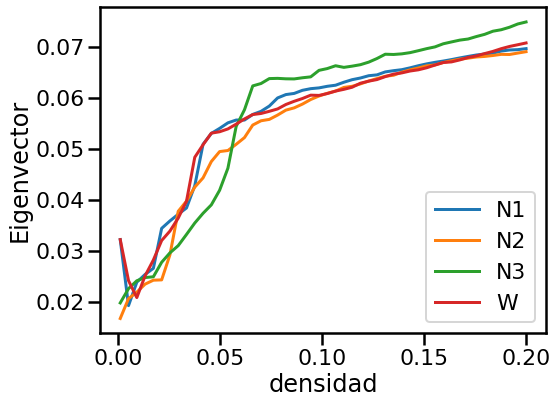

In [ ]:
df_eigenvector.groupby('estadio')['eigenvector'].plot(legend=True)
plt.ylabel('Eigenvector')

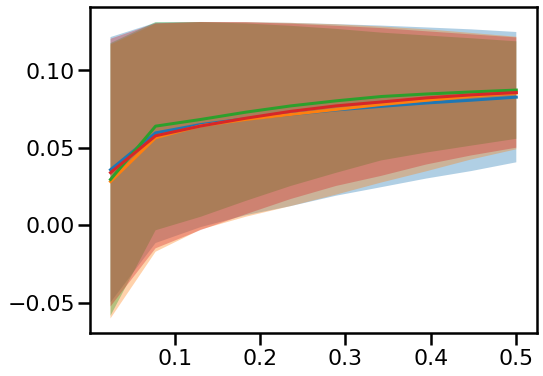

In [ ]:
# Para que funcione densidad no tiene que se indice
fig, ax = plt.subplots()
for i, m in df_eigenvector.groupby("estadio"):
    ax.plot(m["densidad"], m['eigenvector'])
    ax.fill_between(m["densidad"],
                    m['eigenvector'] - m['sd'],
                    m['eigenvector'] + m['sd'], alpha=0.35)